# Training Linear Models

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 1) The normal equation
"The most exact way"

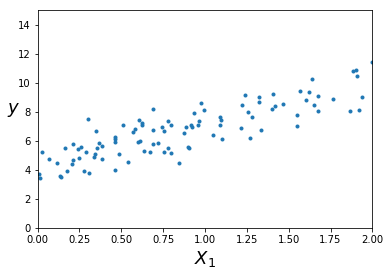

In [20]:
plt.plot(X, y, ".")
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [51]:
def add_x0(X):
    """add x0 = 1 to each instance."""
    shape = X.shape
    return np.c_[np.ones(shape), X]

In [53]:
X_b = add_x0(X) 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.2811505 ],
       [2.82920874]])

In [63]:
X_new = np.array([
    [0],
    [2]
])

X_new_b = add_x0(X_new)
X_new_b

array([[1., 0.],
       [1., 2.]])

In [65]:
y_new = X_new_b.dot(theta_best)

In [66]:
X_new

array([[0],
       [2]])

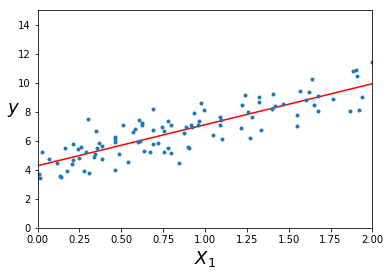

In [67]:
plt.plot(X_new, y_new, 'r-')
plt.plot(X, y, ".")
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# 2) The SVG Way
The choice for Scikit-Learn LinearRegressor.
The normal equation may not work everytime, because some X matrices may not be intertible (m < n).

So, we can use the pseudo inverse X from Singular Value Decomposition  to compute our theta parameters!

In [76]:
np.linalg.pinv(X_b).dot(y) # Oh yes, the same parameters =)

array([[4.2811505 ],
       [2.82920874]])

# 3) Batch Gradient

In [132]:
def add_x0(X):
    """add x0 = 1 to each instance."""
    shape = X.shape
    return np.c_[np.ones(shape), X]

def calc_gradient_vectors(X, y, theta):
    return 2/m * X.T.dot(X.dot(theta) - y)

def predict(X, theta):
    return X.dot(theta)

In [97]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    if iteration % 50 == 0:
        print(f'i {iteration: } ->  theta {theta.flatten()}')
    gradients = calc_gradient_vector(X_b, y, theta)
    theta = theta - eta * gradients # Nice!

i  0 ->  theta [-0.13121415  0.67794784]
i  50 ->  theta [4.0392329 3.0655163]
i  100 ->  theta [4.23166291 2.87754872]
i  150 ->  theta [4.27102713 2.83909735]
i  200 ->  theta [4.27907963 2.83123159]
i  250 ->  theta [4.28072688 2.82962254]
i  300 ->  theta [4.28106385 2.82929339]
i  350 ->  theta [4.28113278 2.82922605]
i  400 ->  theta [4.28114688 2.82921228]
i  450 ->  theta [4.28114976 2.82920946]
i  500 ->  theta [4.28115035 2.82920889]
i  550 ->  theta [4.28115047 2.82920877]
i  600 ->  theta [4.2811505  2.82920874]
i  650 ->  theta [4.2811505  2.82920874]
i  700 ->  theta [4.2811505  2.82920874]
i  750 ->  theta [4.2811505  2.82920874]
i  800 ->  theta [4.2811505  2.82920874]
i  850 ->  theta [4.2811505  2.82920874]
i  900 ->  theta [4.2811505  2.82920874]
i  950 ->  theta [4.2811505  2.82920874]


In [155]:
def plot_current_model_line(theta, X_new=np.array([[0],[2]])):
    y_new = predict(add_x0(X_new), theta)
    plt.plot(X_new, y_new, 'g--')

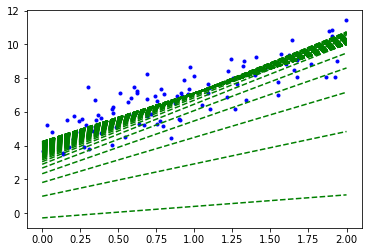

In [157]:
def plot_gradient(X, y, theta=np.random.randn(2,1), eta=0.1, iterations=100):
    X_b = add_x0(X)
    
    plt.plot(X, y, 'b.')
    plot_current_model_line(theta)
    
    for iteration in range(iterations):
        gradients = calc_gradient_vector(X_b, y, theta)
        theta = theta - eta * gradients
        plot_current_model_line(theta)
    
plot_gradient(X, y)

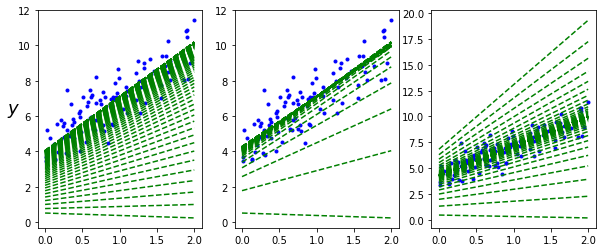

In [159]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient(X, y, theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient(X, y,theta, eta=0.1)
plt.subplot(133); plot_gradient(X, y, theta, eta=0.5)
